# statistical analysis per genre

In [2]:
from utils import *

import_data_science(globals())

# Waveform

In [2]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/x_waveform.npy", 'rb') as f:
    waveforms = np.load(f, allow_pickle=True)

with open(f"{training_data}/labels.npy", 'rb') as f:
    labels = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(waveforms, labels)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock[0:21].mean(axis=0)
hip_hop_mean = hip_hop[0:21].mean(axis=0)
electronic_mean = electronic[0:21].mean(axis=0)
pop_mean = pop[0:21].mean(axis=0)
classical_mean = classical[0:21].mean(axis=0)
mean = waveforms[0:110].mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")

Rock mean feature vector: (22050,)
Hip-Hop mean feature vector: (22050,)
Electronic mean feature vector: (22050,)
Pop mean feature vector: (22050,)
Classical mean feature vector: (22050,)


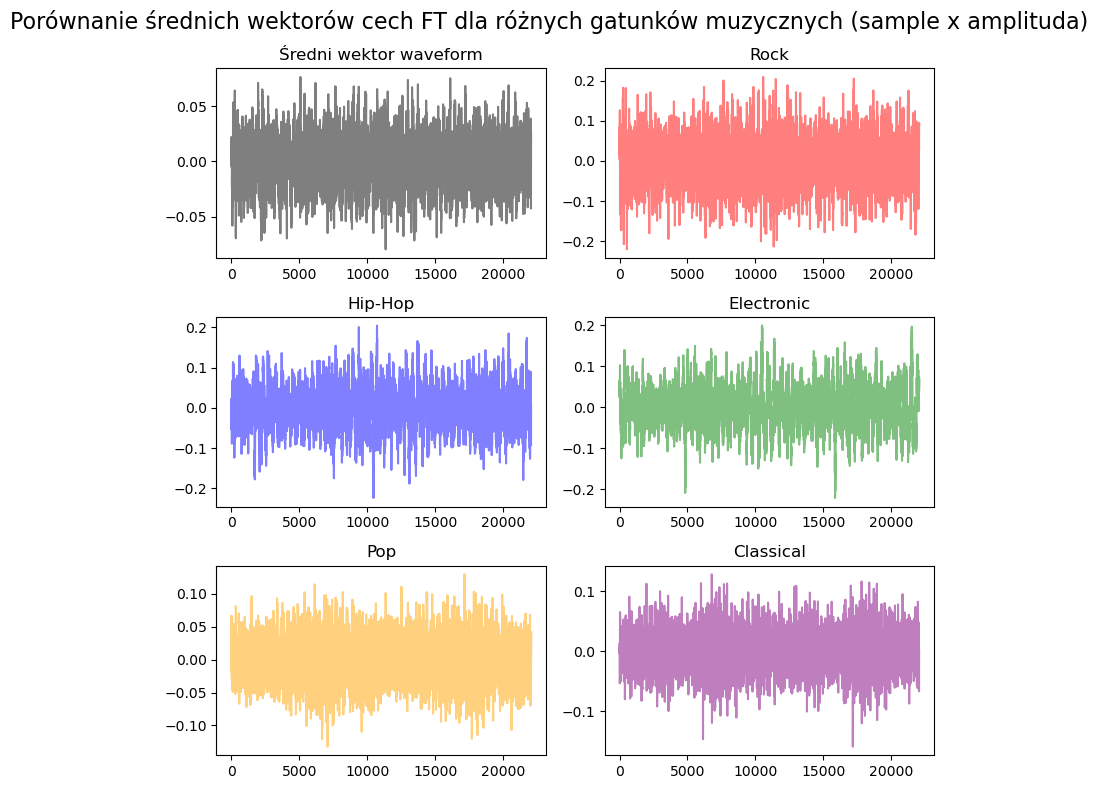

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

axes[0][0].plot(mean, color='black', label='Średni waveform', alpha=0.5)
axes[0][1].plot(rock_mean, color='red', label='Rock', alpha=0.5)
axes[1][0].plot(hip_hop_mean, color='blue', label='Hip-Hop', alpha=0.5)
axes[1][1].plot(electronic_mean, color='green', label='Electronic', alpha=0.5)
axes[2][0].plot(pop_mean, color='orange', label='Pop', alpha=0.5)
axes[2][1].plot(classical_mean, color='purple', label='Classical', alpha=0.5)


axes[0][0].set_title('Średni wektor waveform')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech FT dla różnych gatunków muzycznych (sample x amplituda)', fontsize=16)
plt.tight_layout()
plt.show()

# Fourier Transform

In [4]:
training_data = "/home/rwd/dev/training_data"

# reading signal
with open(f"{training_data}/ft.npy", 'rb') as f:
    ft = np.load(f, allow_pickle=True)

with open(f"{training_data}/ft_labels.npy", 'rb') as f:
    labels = np.load(f, allow_pickle=True)

rock_ft = []
hip_hop_ft = []
electronic_ft = []
pop_ft = []
classical_ft = []

for idx, (sample, label) in enumerate(zip(ft, labels)):
    match label:
        case 0:
            rock_ft.append(sample)
        case 1:
            hip_hop_ft.append(sample)
        case 2:
            electronic_ft.append(sample)
        case 3:
            pop_ft.append(sample)
        case _:
            classical_ft.append(sample)

rock_ft = np.array(rock_ft).astype(np.float32)
hip_hop_ft = np.array(hip_hop_ft).astype(np.float32)
electronic_ft = np.array(electronic_ft).astype(np.float32)
pop_ft = np.array(pop_ft).astype(np.float32)


rock_mean = rock_ft.mean(axis=0)
hip_hop_mean = hip_hop_ft.mean(axis=0)
electronic_mean = electronic_ft.mean(axis=0)
pop_mean = pop_ft.mean(axis=0)
classical_mean = np.array(classical_ft).mean(axis=0)
print(f"Rock feature vector: {rock_mean.shape}")
print(f"Hip-Hop feature vector: {hip_hop_mean.shape}")
print(f"Electronic feature vector: {electronic_mean.shape}")
print(f"Pop feature vector: {pop_mean.shape}")
print(f"Classical feature vector: {classical_mean.shape}")


Rock feature vector: (1025, 87)
Hip-Hop feature vector: (1025, 87)
Electronic feature vector: (1025, 87)
Pop feature vector: (1025, 87)
Classical feature vector: (1025, 87)


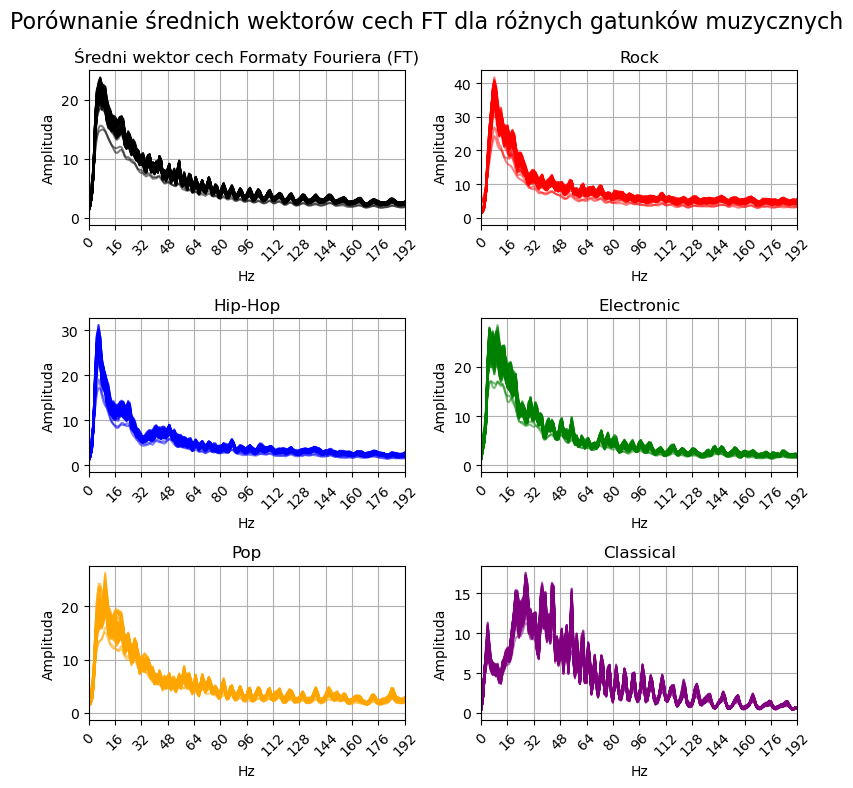

In [6]:
ft_mean = ft.mean(axis=0, keepdims=True)[0]

fig, axes = plt.subplots(3, 2, figsize=(8, 8))

axes[0][0].plot(ft_mean, color='black', label='Średni wektor cech', alpha=0.5)
axes[0][1].plot(rock_mean, color='red', label='Rock', alpha=0.5)
axes[1][0].plot(hip_hop_mean, color='blue', label='Hip-Hop', alpha=0.5)
axes[1][1].plot(electronic_mean, color='green', label='Electronic', alpha=0.5)
axes[2][0].plot(pop_mean, color='orange', label='Pop', alpha=0.5)
axes[2][1].plot(classical_mean, color='purple', label='Classical', alpha=0.5)

for ax in axes.flat:
    ax.set_xlim(0, 192)


axes[0][0].set_title('Średni wektor cech Formaty Fouriera (FT)')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')

for ax in axes.flat:
    ax.set_xlabel('Hz')
    ax.set_ylabel('Amplituda')
    ax.set_xticks(np.arange(0, 193, 16))
    ax.set_xticklabels(np.arange(0, 193, 16), rotation=45)
    ax.grid(True)


fig.suptitle('Porównanie średnich wektorów cech FT dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

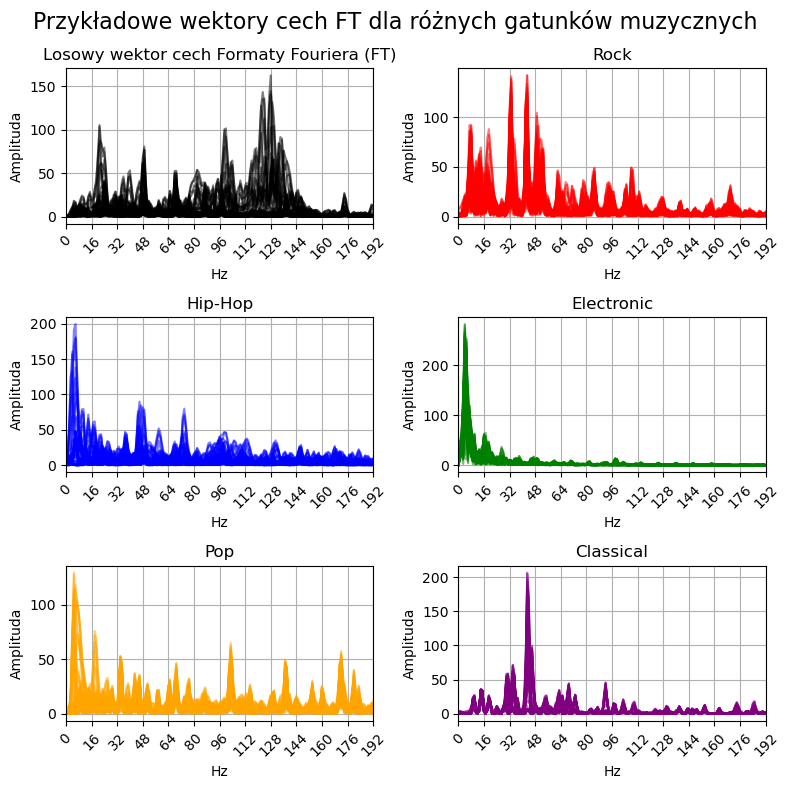

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

axes[0][0].plot(ft[1200], color='black', label='Średni wektor cech', alpha=0.5)
axes[0][1].plot(rock_ft[4], color='red', label='Rock', alpha=0.5)
axes[1][0].plot(hip_hop_ft[4], color='blue', label='Hip-Hop', alpha=0.5)
axes[1][1].plot(electronic_ft[4], color='green', label='Electronic', alpha=0.5)
axes[2][0].plot(pop_ft[4], color='orange', label='Pop', alpha=0.5)
axes[2][1].plot(classical_ft[4], color='purple', label='Classical', alpha=0.5)

for ax in axes.flat:
    ax.set_xlim(0, 192)


axes[0][0].set_title('Losowy wektor cech Formaty Fouriera (FT)')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')

for ax in axes.flat:
    ax.set_xlabel('Hz')
    ax.set_ylabel('Amplituda')
    ax.set_xticks(np.arange(0, 193, 16))
    ax.set_xticklabels(np.arange(0, 193, 16), rotation=45)
    ax.grid(True)


fig.suptitle('Przykładowe wektory cech FT dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

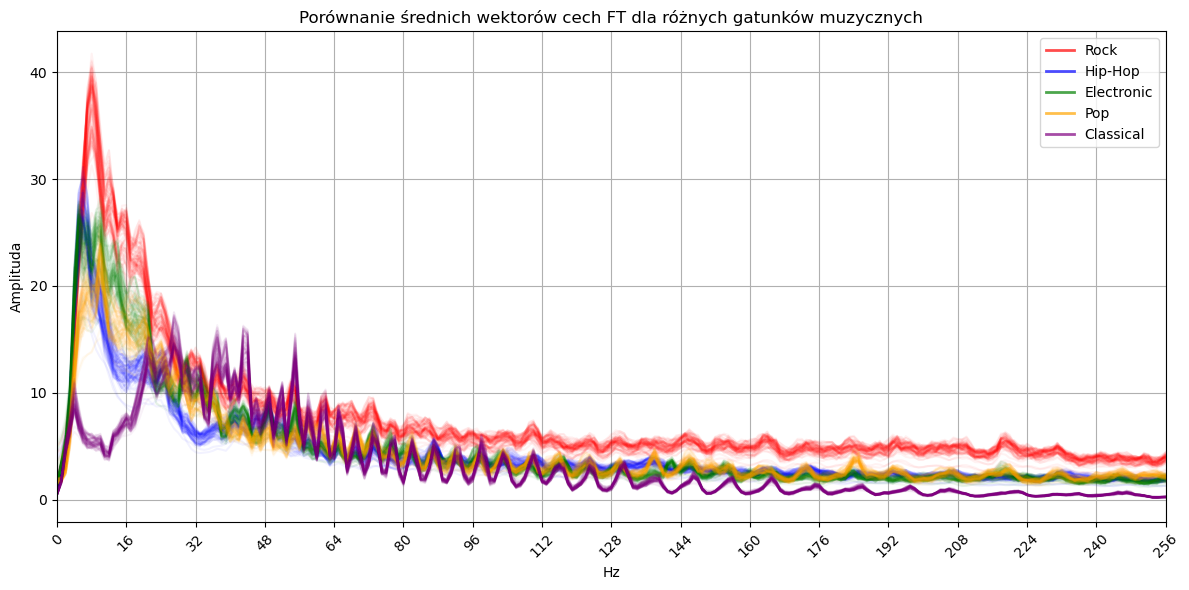

In [83]:
import matplotlib.lines as mlines

ft_mean = ft.mean(axis=0, keepdims=True)[0]

plt.figure(figsize=(12, 6))
plt.plot(rock_mean, color='red', label='Rock', alpha=0.05)
plt.plot(hip_hop_mean, color='blue', label='Hip-Hop', alpha=0.05)
plt.plot(electronic_mean, color='green', label='Electronic', alpha=0.05)
plt.plot(pop_mean, color='orange', label='Pop', alpha=0.05)
plt.plot(classical_mean, color='purple', label='Classical', alpha=0.05)

legend_handles = [
    mlines.Line2D([], [], color='red', linewidth=2, label='Rock', alpha=0.7),
    mlines.Line2D([], [], color='blue', linewidth=2, label='Hip-Hop', alpha=0.7),
    mlines.Line2D([], [], color='green', linewidth=2, label='Electronic', alpha=0.7),
    mlines.Line2D([], [], color='orange', linewidth=2, label='Pop', alpha=0.7),
    mlines.Line2D([], [], color='purple', linewidth=2, label='Classical', alpha=0.7),
]


plt.xlim(0, 256)
plt.xlabel('Hz')
plt.ylabel('Amplituda')
plt.xticks(np.arange(0, 257, 16), rotation=45)
plt.grid(True)
plt.title('Porównanie średnich wektorów cech FT dla różnych gatunków muzycznych')
plt.legend(handles=legend_handles, loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Spectogram

In [9]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/spectogram.npy", 'rb') as f:
    spec = np.load(f, allow_pickle=True)

with open(f"{training_data}/spectogram_labels.npy", 'rb') as f:
    spec_labels = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(spec, spec_labels)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock[7:10].mean(axis=0)
hip_hop_mean = hip_hop[7:10].mean(axis=0)
electronic_mean = electronic[7:10].mean(axis=0)
pop_mean = pop[7:10].mean(axis=0)
classical_mean = classical[7:10].mean(axis=0)
mean = spec[0:10].mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")

Rock mean feature vector: (1025, 87)
Hip-Hop mean feature vector: (1025, 87)
Electronic mean feature vector: (1025, 87)
Pop mean feature vector: (1025, 87)
Classical mean feature vector: (1025, 87)


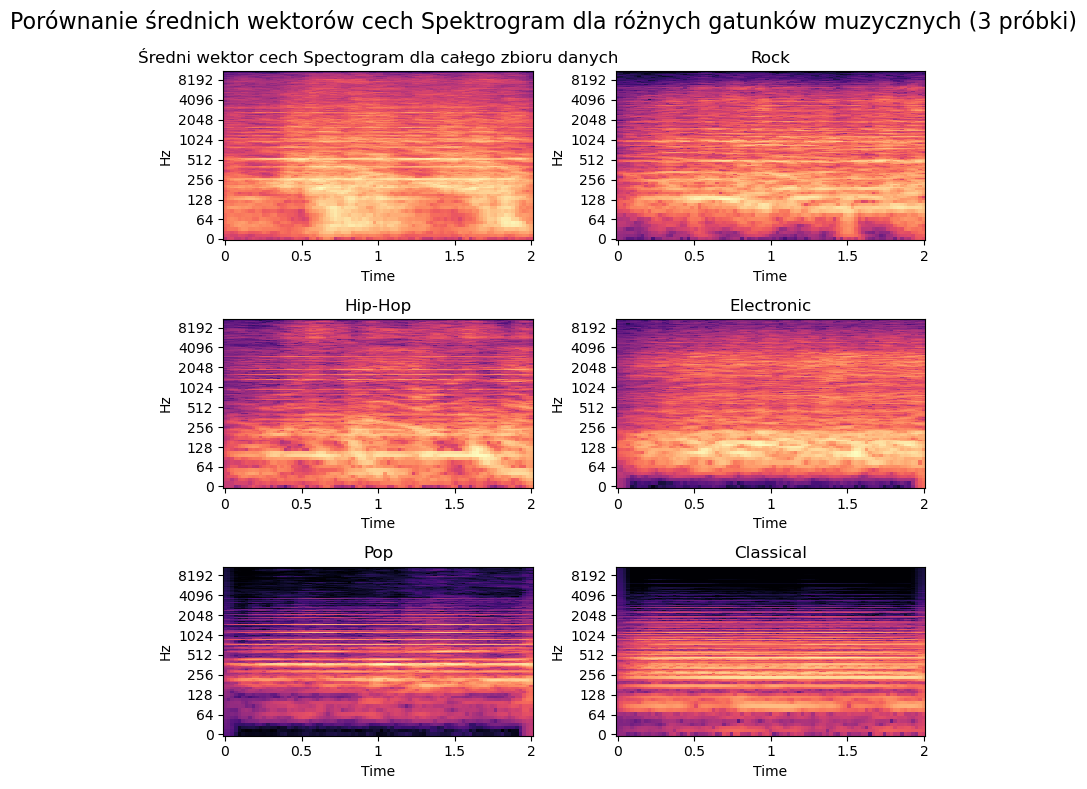

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

librosa.display.specshow(mean, sr=22050, x_axis='time', y_axis='log', ax=axes[0][0])
librosa.display.specshow(rock_mean, sr=22050, x_axis='time', y_axis='log', ax=axes[0][1])
librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', y_axis='log', ax=axes[1][0])
librosa.display.specshow(electronic_mean, sr=22050, x_axis='time', y_axis='log', ax=axes[1][1])
librosa.display.specshow(pop_mean, sr=22050, x_axis='time', y_axis='log', ax=axes[2][0])
librosa.display.specshow(classical_mean, sr=22050, x_axis='time', y_axis='log', ax=axes[2][1])


axes[0][0].set_title('Średni wektor cech Spectogram dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech Spektrogram dla różnych gatunków muzycznych (3 próbki)', fontsize=16)
plt.tight_layout()
plt.show()

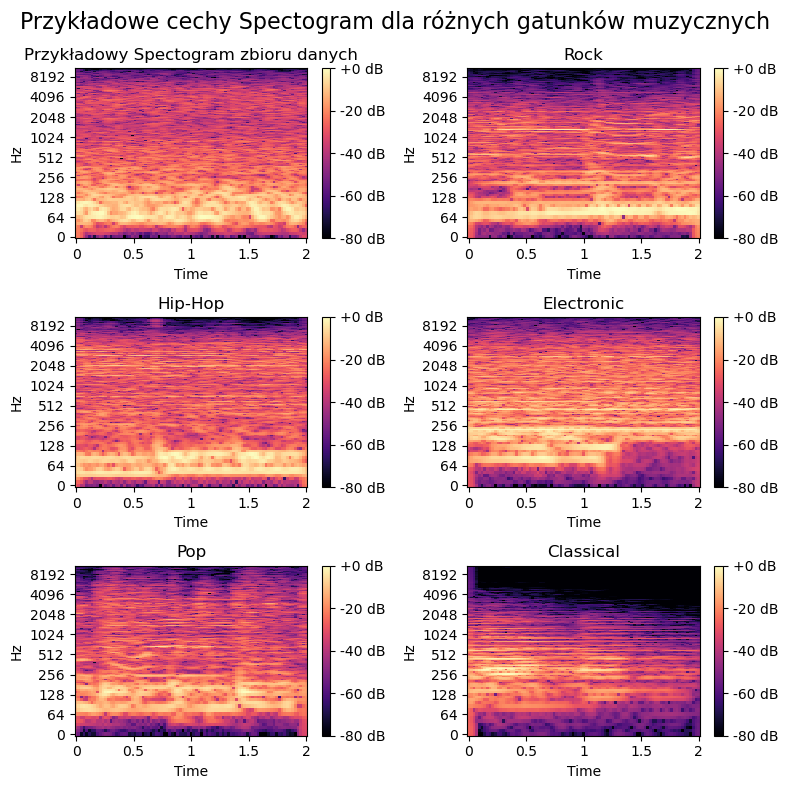

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

img = librosa.display.specshow(spec[155], sr=22050, x_axis='time', y_axis='log', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format="%+2.0f dB")
img = librosa.display.specshow(rock[155], sr=22050, x_axis='time', y_axis='log', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format="%+2.0f dB")
img = librosa.display.specshow(hip_hop[155], sr=22050, x_axis='time', y_axis='log', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format="%+2.0f dB")
img = librosa.display.specshow(electronic[155], sr=22050, x_axis='time', y_axis='log', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format="%+2.0f dB")
img = librosa.display.specshow(pop[155], sr=22050, x_axis='time', y_axis='log', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format="%+2.0f dB")
img = librosa.display.specshow(classical[155], sr=22050, x_axis='time', y_axis='log', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format="%+2.0f dB")

axes[0][0].set_title('Przykładowy Spektrogram zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Przykładowe cechy Spektrogram dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Mel Spectogram

In [14]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/mel_spectogram.npy", 'rb') as f:
    mel_spec = np.load(f, allow_pickle=True)

with open(f"{training_data}/mel_spectogram_labels.npy", 'rb') as f:
    mel_spec_labels = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(mel_spec, mel_spec_labels)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock[0:7].mean(axis=0)
hip_hop_mean = hip_hop[0:7].mean(axis=0)
electronic_mean = electronic[0:7].mean(axis=0)
pop_mean = pop[0:7].mean(axis=0)
classical_mean = classical[0:7].mean(axis=0)
mean = spec[0:110].mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")

Rock mean feature vector: (1025, 87)
Hip-Hop mean feature vector: (1025, 87)
Electronic mean feature vector: (1025, 87)
Pop mean feature vector: (1025, 87)
Classical mean feature vector: (1025, 87)


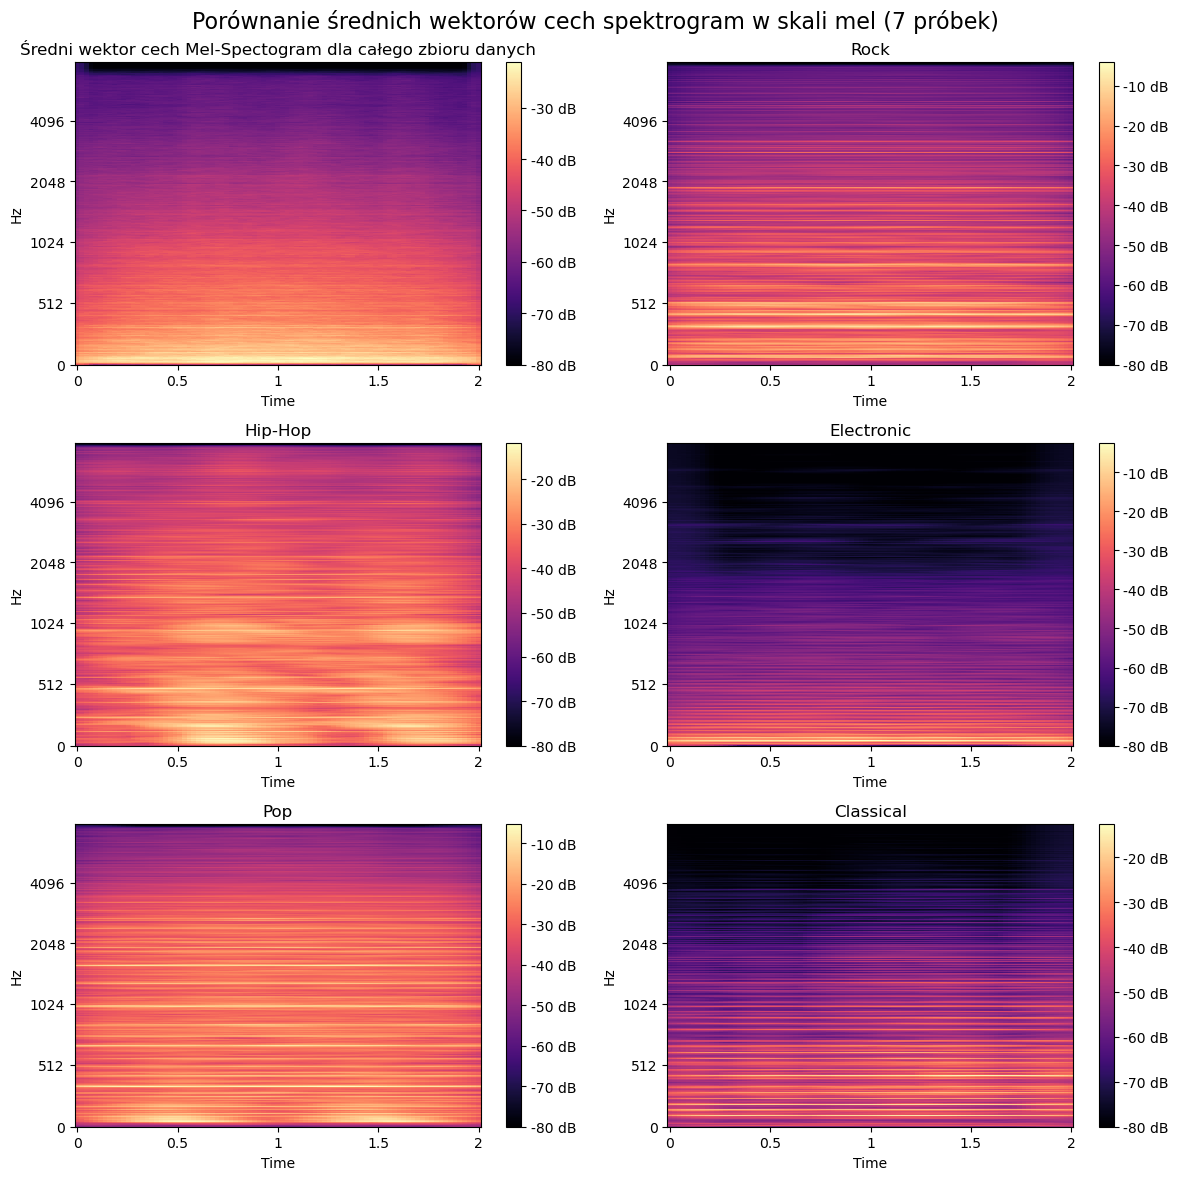

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(mean, sr=22050, x_axis='time',y_axis='mel', fmax=8000, ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format="%+2.0f dB")
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time',y_axis='mel',  fmax=8000, ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format="%+2.0f dB")
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time',y_axis='mel', fmax=8000,  ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format="%+2.0f dB")
img = librosa.display.specshow(electronic_mean, sr=22050, x_axis='time',y_axis='mel', fmax=8000, ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format="%+2.0f dB")
img = librosa.display.specshow(pop_mean, sr=22050, x_axis='time',y_axis='mel', fmax=8000, ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format="%+2.0f dB")
img = librosa.display.specshow(classical_mean, sr=22050, x_axis='time',y_axis='mel', fmax=8000, ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format="%+2.0f dB")


axes[0][0].set_title('Średni wektor cech Mel-Spectogram dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech spektrogram w skali mel (7 próbek)', fontsize=16)
plt.tight_layout()
plt.show()

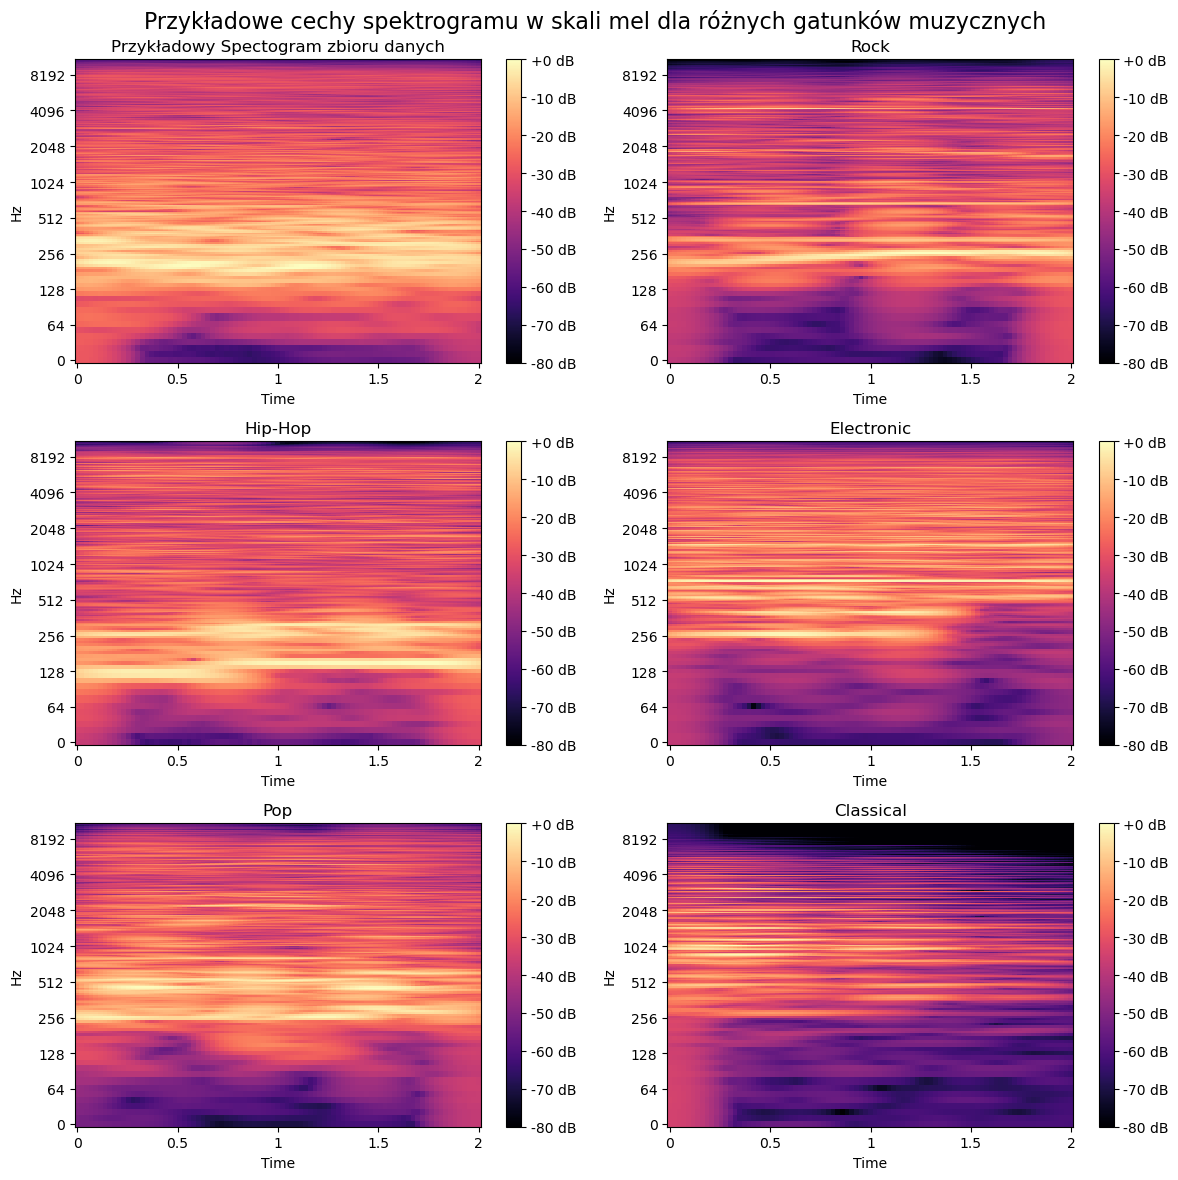

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(mel_spec[155], sr=22050, x_axis='time', y_axis='log', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format="%+2.0f dB")
img = librosa.display.specshow(rock[155], sr=22050, x_axis='time', y_axis='log', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format="%+2.0f dB")
img = librosa.display.specshow(hip_hop[155], sr=22050, x_axis='time', y_axis='log', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format="%+2.0f dB")
img = librosa.display.specshow(electronic[155], sr=22050, x_axis='time', y_axis='log', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format="%+2.0f dB")
img = librosa.display.specshow(pop[155], sr=22050, x_axis='time', y_axis='log', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format="%+2.0f dB")
img = librosa.display.specshow(classical[155], sr=22050, x_axis='time', y_axis='log', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format="%+2.0f dB")

axes[0][0].set_title('Przykładowy Spectogram zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Przykładowe cechy spektrogramu w skali mel dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Power Spectogram

In [66]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/power_spectogram.npy", 'rb') as f:
    power_spec = np.load(f, allow_pickle=True)

with open(f"{training_data}/power_spectogram_labels.npy", 'rb') as f:
    power_spec_labels = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(power_spec, power_spec_labels)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock[0:21].mean(axis=0)
hip_hop_mean = hip_hop[0:21].mean(axis=0)
electronic_mean = electronic[0:21].mean(axis=0)
pop_mean = pop[0:21].mean(axis=0)
classical_mean = classical[0:21].mean(axis=0)
mean = spec[0:110].mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")

Rock mean feature vector: (1025, 87)
Hip-Hop mean feature vector: (1025, 87)
Electronic mean feature vector: (1025, 87)
Pop mean feature vector: (1025, 87)
Classical mean feature vector: (1025, 87)


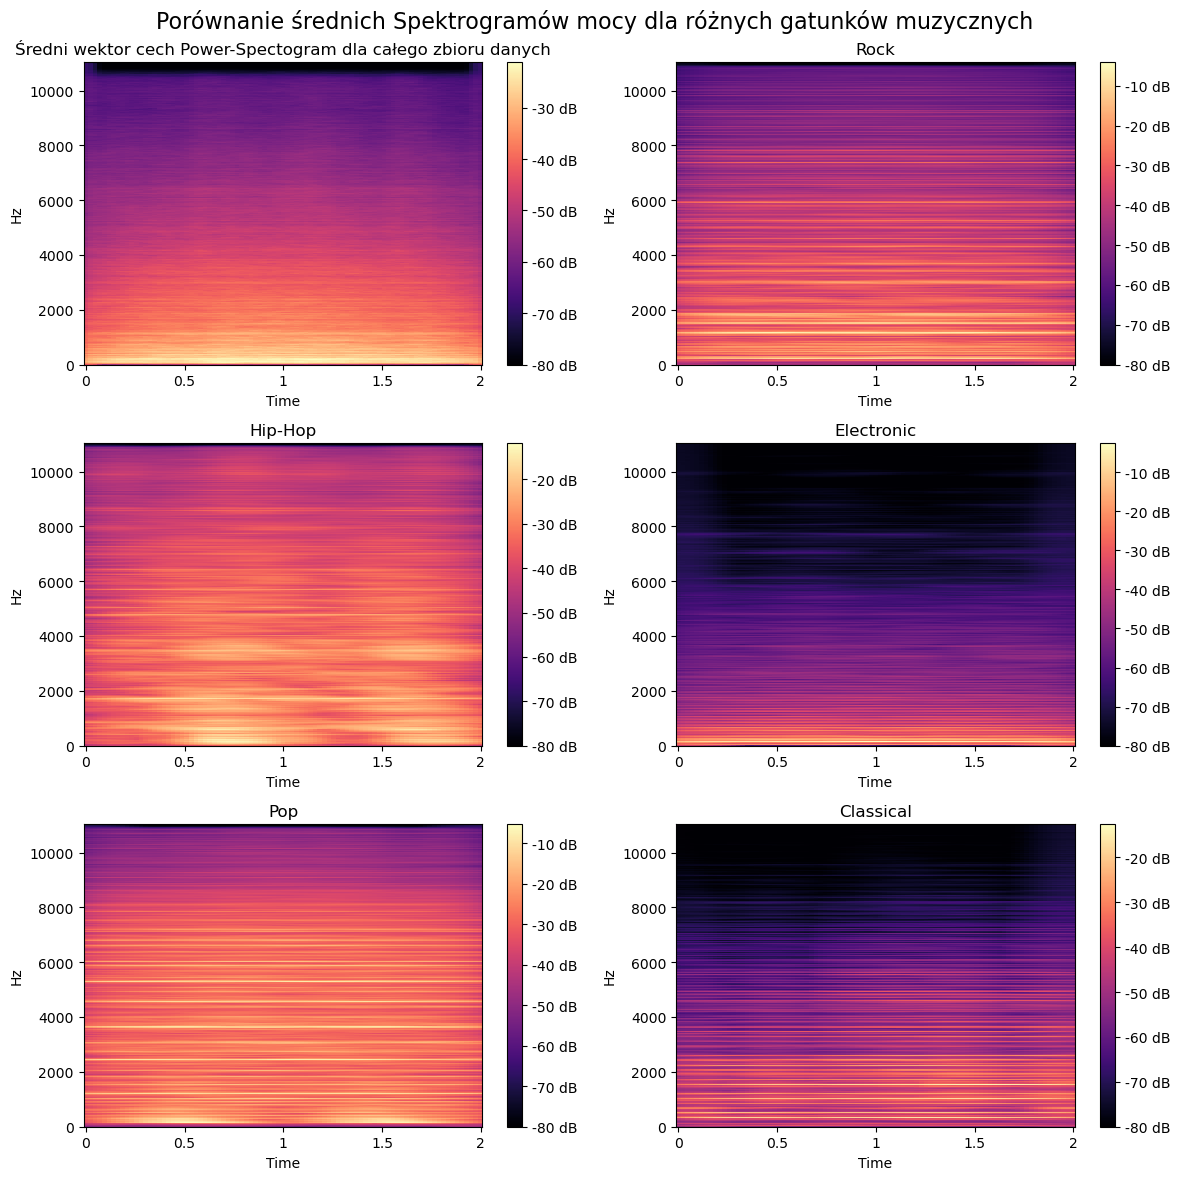

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(mean, sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format='%+2.0f dB')
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time',y_axis='hz',  fmax=8000, ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format='%+2.0f dB')
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time',y_axis='hz', fmax=8000,  ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format='%+2.0f dB')
img = librosa.display.specshow(electronic_mean, sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format='%+2.0f dB')
img = librosa.display.specshow(pop_mean, sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format='%+2.0f dB')
img = librosa.display.specshow(classical_mean, sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format='%+2.0f dB')

axes[0][0].set_title('Średni wektor cech Power-Spectogram dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich Spektrogramów mocy dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

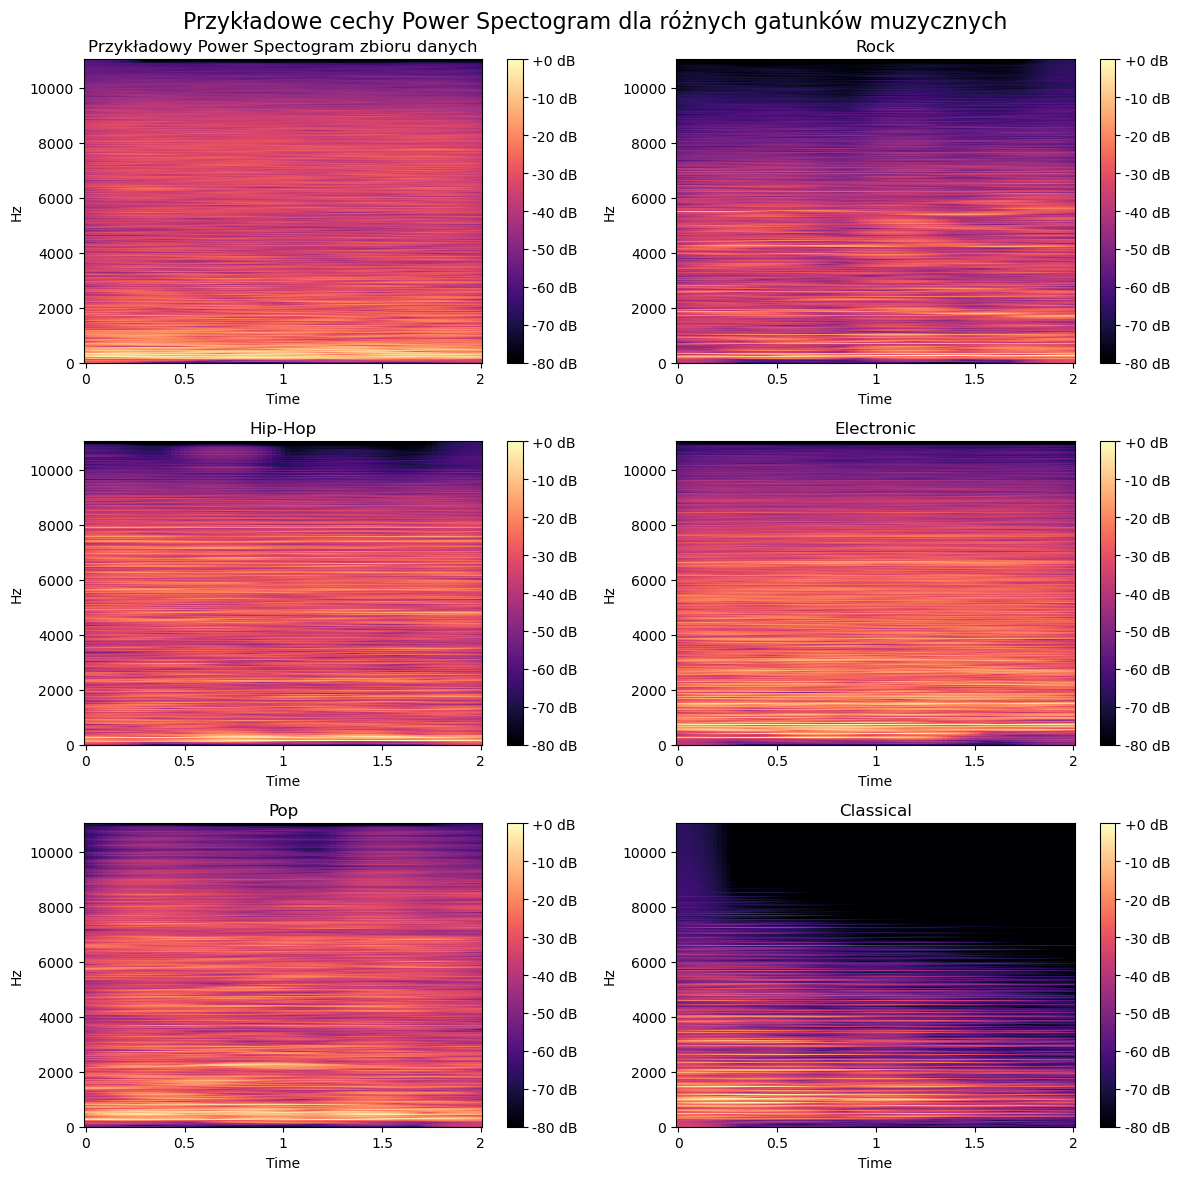

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(mel_spec[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format="%+2.0f dB")
img = librosa.display.specshow(rock[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format="%+2.0f dB")
img = librosa.display.specshow(hip_hop[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format="%+2.0f dB")
img = librosa.display.specshow(electronic[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format="%+2.0f dB")
img = librosa.display.specshow(pop[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format="%+2.0f dB")
img = librosa.display.specshow(classical[155], sr=22050, x_axis='time',y_axis='hz', fmax=8000, ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format="%+2.0f dB")

axes[0][0].set_title('Przykładowy Power Spectogram zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Przykładowe cechy Power Spectogram dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# MFCC

In [87]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/mfcc.npy", 'rb') as f:
    x = np.load(f, allow_pickle=True)

with open(f"{training_data}/mfcc_labels.npy", 'rb') as f:
    y = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(x, y)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock[0:21].mean(axis=0)
hip_hop_mean = hip_hop[0:21].mean(axis=0)
electronic_mean = electronic[0:21].mean(axis=0)
pop_mean = pop[0:21].mean(axis=0)
classical_mean = classical[0:21].mean(axis=0)
mean = x[0:110].mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")

Rock mean feature vector: (12, 87)
Hip-Hop mean feature vector: (12, 87)
Electronic mean feature vector: (12, 87)
Pop mean feature vector: (12, 87)
Classical mean feature vector: (12, 87)


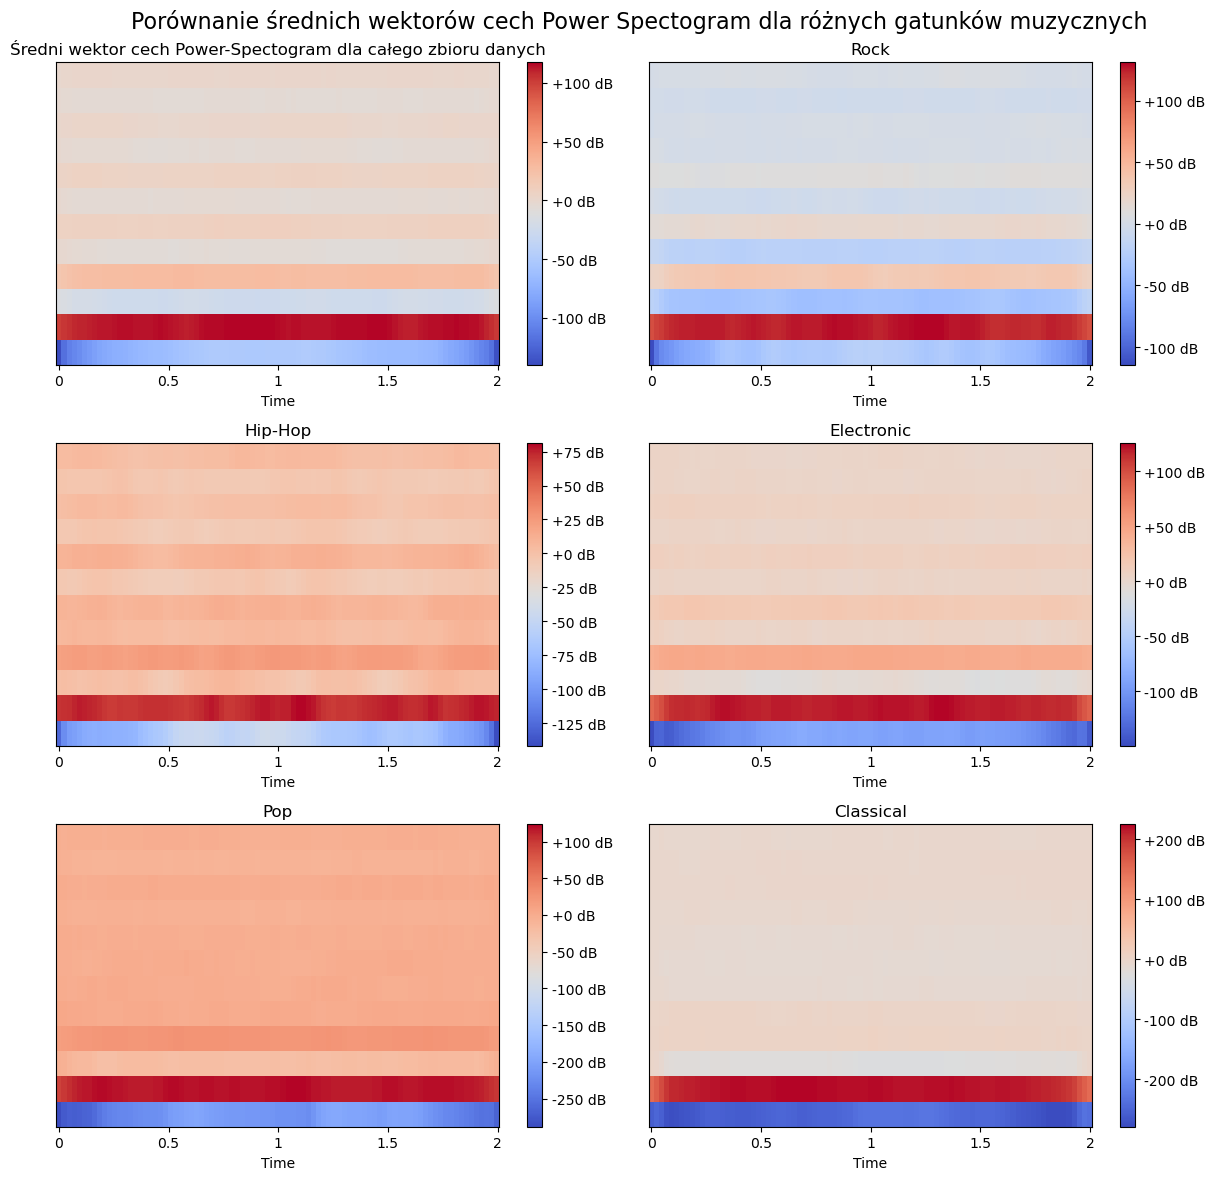

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(mean, sr=22050, x_axis='time', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format='%+2.0f dB')
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format='%+2.0f dB')
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format='%+2.0f dB')
img = librosa.display.specshow(electronic_mean, sr=22050, x_axis='time', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format='%+2.0f dB')
img = librosa.display.specshow(pop_mean, sr=22050, x_axis='time', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format='%+2.0f dB')
img = librosa.display.specshow(classical_mean, sr=22050, x_axis='time', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format='%+2.0f dB')

axes[0][0].set_title('Średni wektor cech dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech MFCC dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

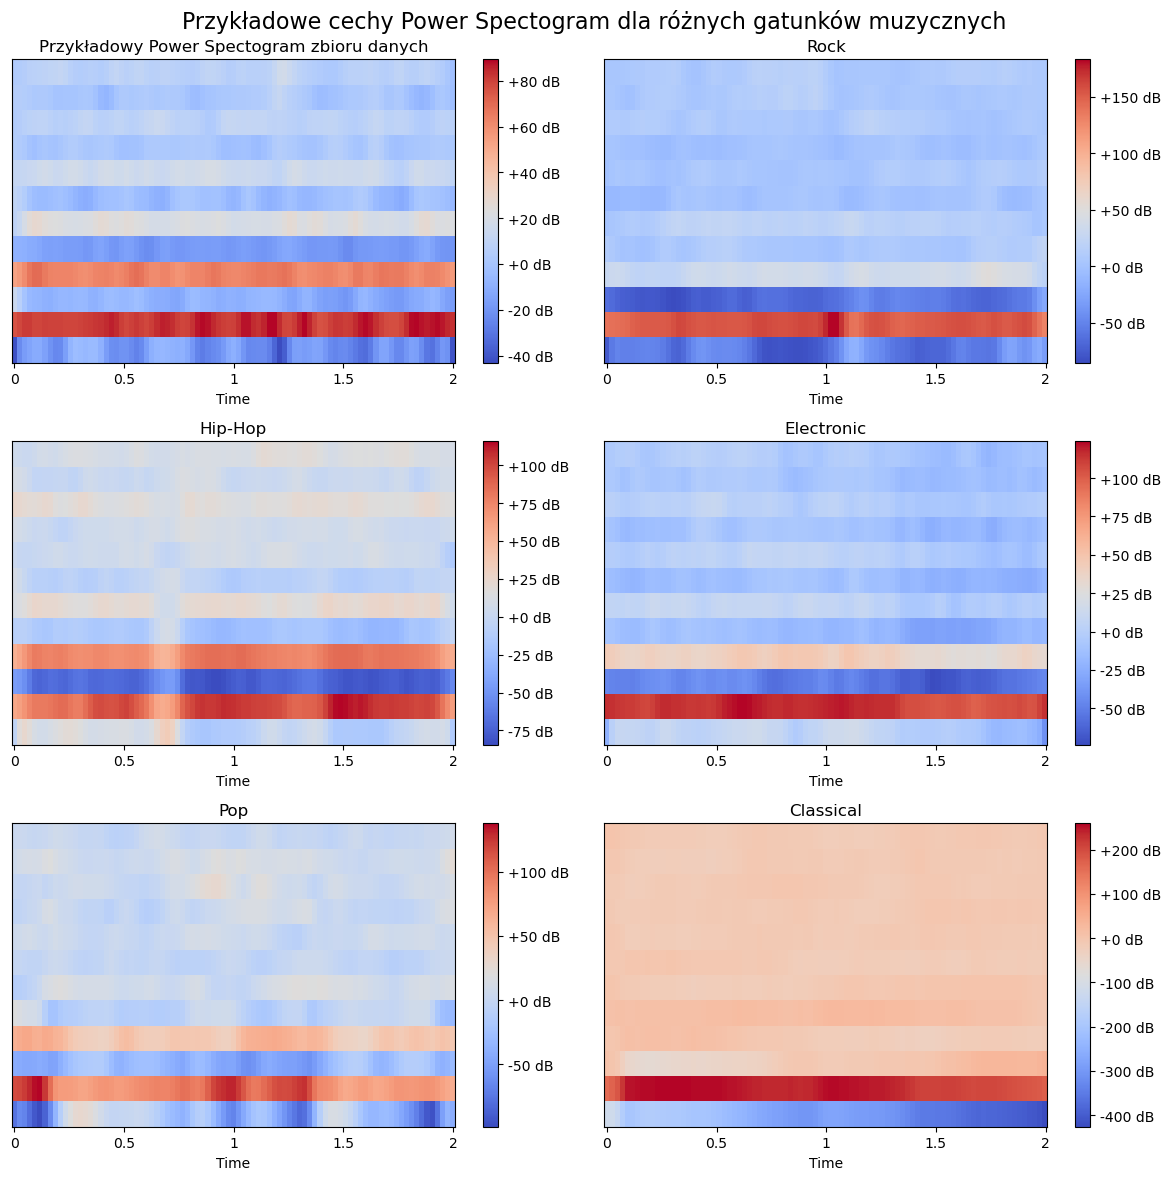

In [92]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

img = librosa.display.specshow(x[155], sr=22050, x_axis='time', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0], format="%+2.0f dB")
img = librosa.display.specshow(rock[155], sr=22050, x_axis='time', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1], format="%+2.0f dB")
img = librosa.display.specshow(hip_hop[155], sr=22050, x_axis='time', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0], format="%+2.0f dB")
img = librosa.display.specshow(electronic[155], sr=22050, x_axis='time', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1], format="%+2.0f dB")
img = librosa.display.specshow(pop[155], sr=22050, x_axis='time', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0], format="%+2.0f dB")
img = librosa.display.specshow(classical[155], sr=22050, x_axis='time', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1], format="%+2.0f dB")


axes[0][0].set_title('Przykładowy Power Spectogram zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Przykładowe cechy Power Spectogram dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Chroma STFT

Rock mean feature vector: (12, 87)
Hip-Hop mean feature vector: (12, 87)
Electronic mean feature vector: (12, 87)
Pop mean feature vector: (12, 87)
Classical mean feature vector: (12, 87)


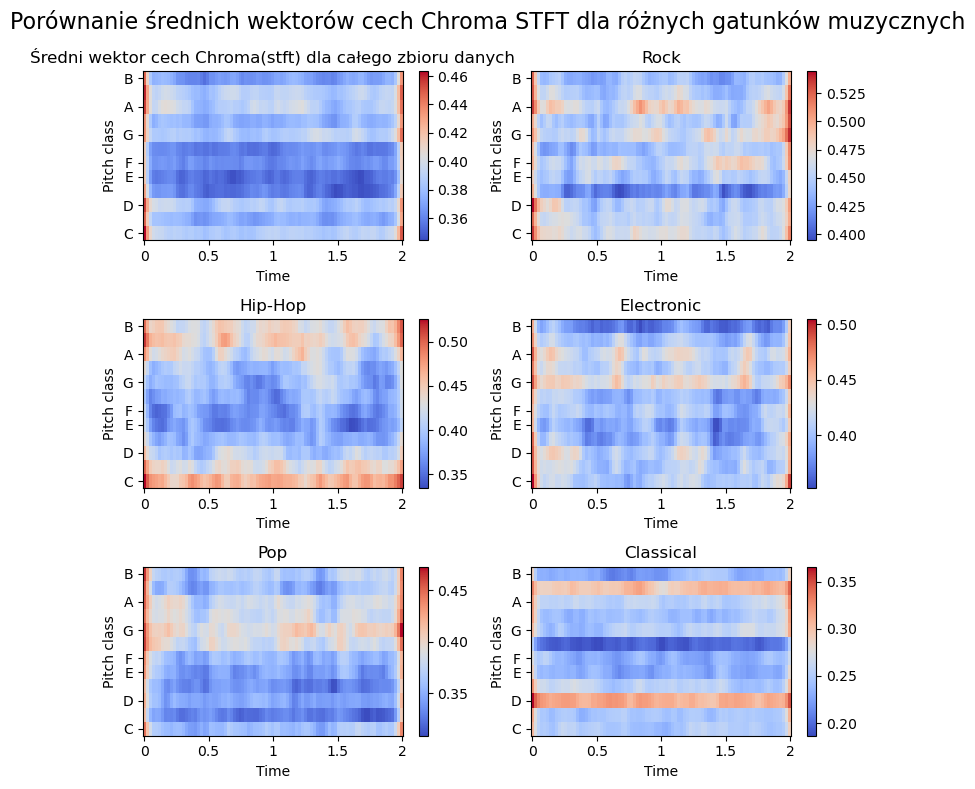

In [104]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/chroma_stft.npy", 'rb') as f:
    x = np.load(f, allow_pickle=True)

with open(f"{training_data}/chroma_stft_labels.npy", 'rb') as f:
    y = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(x, y)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock.mean(axis=0)
hip_hop_mean = hip_hop.mean(axis=0)
electronic_mean = electronic.mean(axis=0)
pop_mean = pop.mean(axis=0)
classical_mean = classical.mean(axis=0)
mean = x.mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")



fig, axes = plt.subplots(3, 2, figsize=(8, 8))

img = librosa.display.specshow(mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0],)
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1],)
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0],)
img = librosa.display.specshow(electronic_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1],)
img = librosa.display.specshow(pop_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0],)
img = librosa.display.specshow(classical_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1],)

axes[0][0].set_title('Średni wektor cech Chroma(stft) dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech Chroma STFT dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Chroma CQT

Rock mean feature vector: (12, 44)
Hip-Hop mean feature vector: (12, 44)
Electronic mean feature vector: (12, 44)
Pop mean feature vector: (12, 44)
Classical mean feature vector: (12, 44)


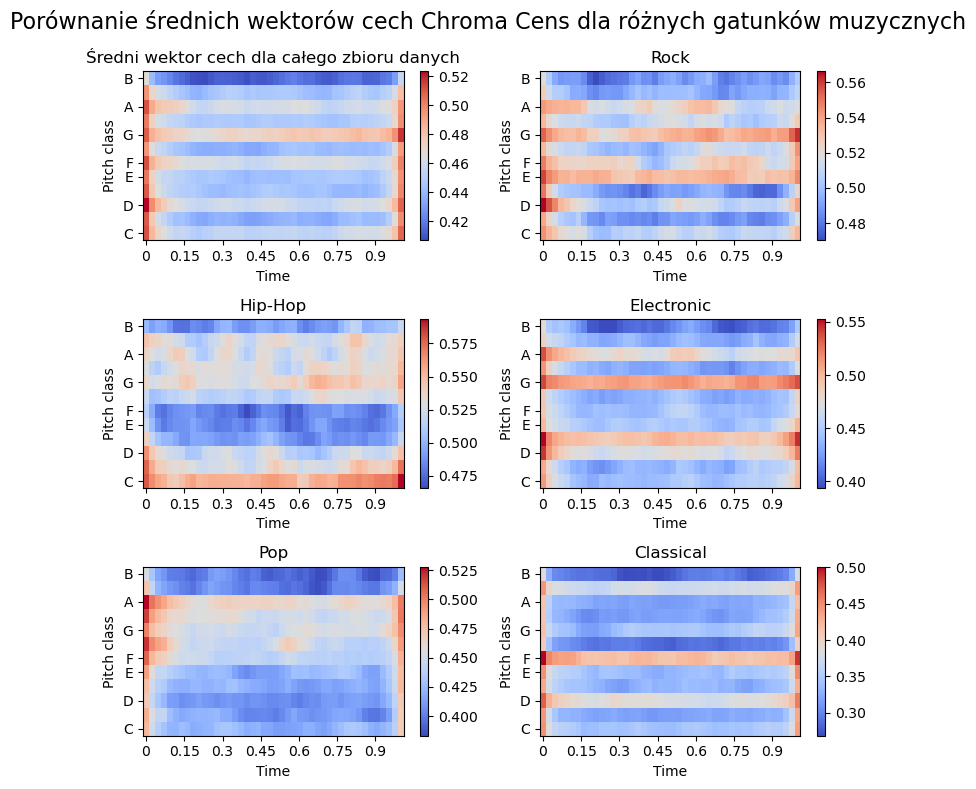

In [3]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/chroma_cqt.npy", 'rb') as f:
    x = np.load(f, allow_pickle=True)

with open(f"{training_data}/chroma_cqt_labels.npy", 'rb') as f:
    y = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(x, y)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock.mean(axis=0)
hip_hop_mean = hip_hop.mean(axis=0)
electronic_mean = electronic.mean(axis=0)
pop_mean = pop.mean(axis=0)
classical_mean = classical.mean(axis=0)
mean = x.mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")



fig, axes = plt.subplots(3, 2, figsize=(8, 8))

img = librosa.display.specshow(mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0],)
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1],)
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0],)
img = librosa.display.specshow(electronic_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1],)
img = librosa.display.specshow(pop_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0],)
img = librosa.display.specshow(classical_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1],)

axes[0][0].set_title('Średni wektor cech dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech Chroma Cens dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Chroma Cens

Rock mean feature vector: (12, 44)
Hip-Hop mean feature vector: (12, 44)
Electronic mean feature vector: (12, 44)
Pop mean feature vector: (12, 44)
Classical mean feature vector: (12, 44)


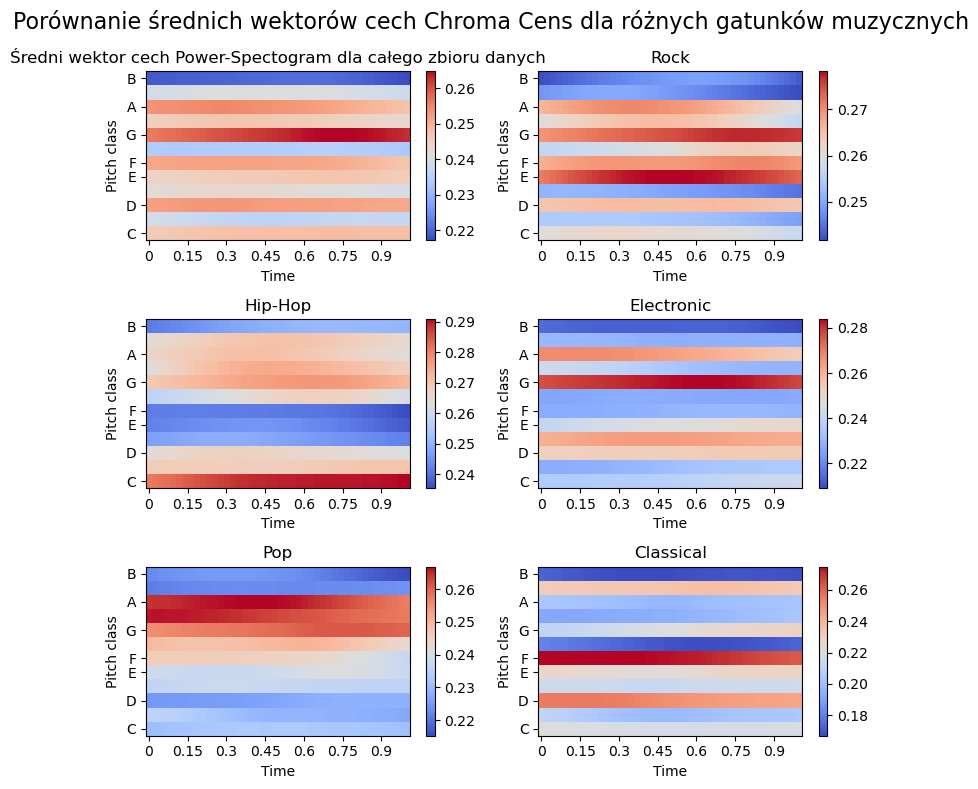

In [106]:

training_data = "/home/rwd/dev/training_data"


# reading signal
with open(f"{training_data}/chroma_cens.npy", 'rb') as f:
    x = np.load(f, allow_pickle=True)

with open(f"{training_data}/chroma_cens_labels.npy", 'rb') as f:
    y = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(x, y)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock.mean(axis=0)
hip_hop_mean = hip_hop.mean(axis=0)
electronic_mean = electronic.mean(axis=0)
pop_mean = pop.mean(axis=0)
classical_mean = classical.mean(axis=0)
mean = x.mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")



fig, axes = plt.subplots(3, 2, figsize=(8, 8))

img = librosa.display.specshow(mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0],)
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1],)
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0],)
img = librosa.display.specshow(electronic_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1],)
img = librosa.display.specshow(pop_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0],)
img = librosa.display.specshow(classical_mean, sr=22050,  x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1],)

axes[0][0].set_title('Średni wektor cech Power-Spectogram dla całego zbioru danych')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Porównanie średnich wektorów cech Chroma Cens dla różnych gatunków muzycznych', fontsize=16)
plt.tight_layout()
plt.show()

# Tonnetz

Rock mean feature vector: (6, 44)
Hip-Hop mean feature vector: (6, 44)
Electronic mean feature vector: (6, 44)
Pop mean feature vector: (6, 44)
Classical mean feature vector: (6, 44)


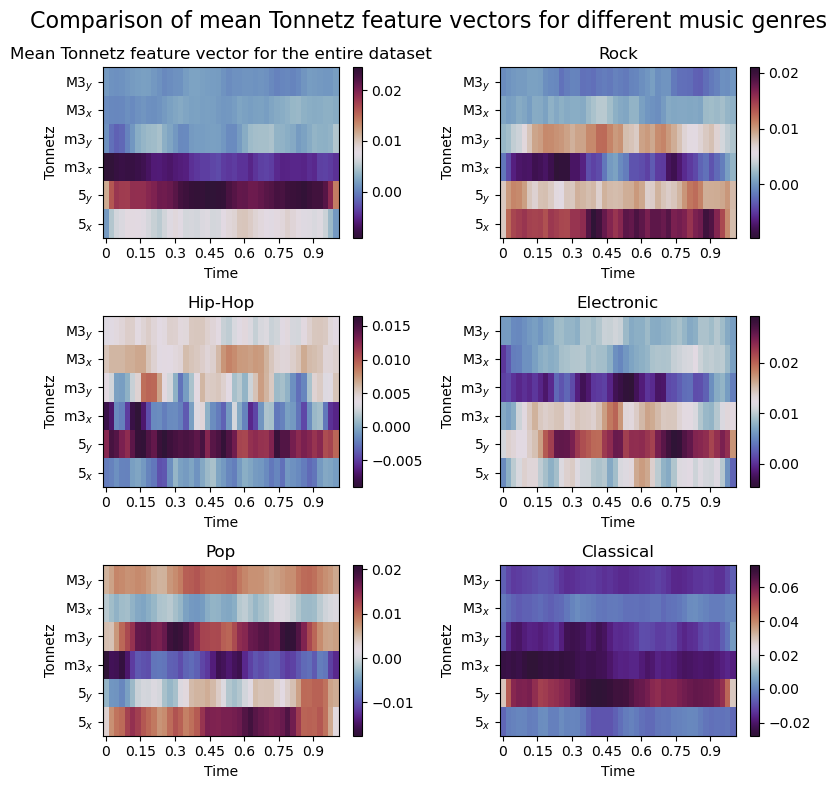

In [ ]:

training_data = "/home/rwd/dev/training_data"X_train_loader = DataLoader(X_train, batch_size=64, shuffle=)


# reading signal
with open(f"{training_data}/tonnetz.npy", 'rb') as f:
    x = np.load(f, allow_pickle=True)

with open(f"{training_data}/tonnetz_labels.npy", 'rb') as f:
    y = np.load(f, allow_pickle=True)

rock = []
hip_hop = []
electronic = []
pop = []
classical = []

for idx, (sample, label) in enumerate(zip(x, y)):
    match label:
        case 0:
            rock.append(sample)
        case 1:
            hip_hop.append(sample)
        case 2:
            electronic.append(sample)
        case 3:
            pop.append(sample)
        case _:
            classical.append(sample)

rock = np.array(rock).astype(np.float32)
hip_hop = np.array(hip_hop).astype(np.float32)
electronic = np.array(electronic).astype(np.float32)
pop = np.array(pop).astype(np.float32)
classical = np.array(classical).astype(np.float32)


rock_mean = rock.mean(axis=0)
hip_hop_mean = hip_hop.mean(axis=0)
electronic_mean = electronic.mean(axis=0)
pop_mean = pop.mean(axis=0)
classical_mean = classical.mean(axis=0)
mean = x.mean(axis=0, keepdims=True)[0]

print(f"Rock mean feature vector: {rock_mean.shape}")
print(f"Hip-Hop mean feature vector: {hip_hop_mean.shape}")
print(f"Electronic mean feature vector: {electronic_mean.shape}")
print(f"Pop mean feature vector: {pop_mean.shape}")
print(f"Classical mean feature vector: {classical_mean.shape}")



fig, axes = plt.subplots(3, 2, figsize=(8, 8))

img = librosa.display.specshow(mean, sr=22050,  x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[0][0])
plt.colorbar(img, ax=axes[0][0],)
img = librosa.display.specshow(rock_mean, sr=22050, x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[0][1])
plt.colorbar(img, ax=axes[0][1],)
img = librosa.display.specshow(hip_hop_mean, sr=22050, x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[1][0])
plt.colorbar(img, ax=axes[1][0],)
img = librosa.display.specshow(electronic_mean, sr=22050,  x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[1][1])
plt.colorbar(img, ax=axes[1][1],)
img = librosa.display.specshow(pop_mean, sr=22050,  x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[2][0])
plt.colorbar(img, ax=axes[2][0],)
img = librosa.display.specshow(classical_mean, sr=22050,  x_axis='time', y_axis='tonnetz', cmap='twilight_shifted', ax=axes[2][1])
plt.colorbar(img, ax=axes[2][1],)

axes[0][0].set_title('Mean Tonnetz feature vector for the entire dataset')
axes[0][1].set_title('Rock')
axes[1][0].set_title('Hip-Hop')
axes[1][1].set_title('Electronic')
axes[2][0].set_title('Pop')
axes[2][1].set_title('Classical')


fig.suptitle('Comparison of mean Tonnetz feature vectors for different music genres', fontsize=16)
plt.tight_layout()
plt.show()